In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from dask.distributed import Client

In [2]:
client = Client()
client

<Client: 'tcp://127.0.0.1:49936' processes=4 threads=8, memory=8.00 GiB>

In [3]:

reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks={"time": 48},
    storage_options=dict(token='anon'),
)

In [4]:
reanalysis

<xarray.Dataset>
Dimensions:                                                          (
                                                                      time: 1323648,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 ...
  * level                                                            (level) int64 ...
  * longitude                                                        (longitude) float32 ...
  * time                                                             (time) datetime64[ns] ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    wave_spectral_skewness                                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    zero_degree_level                                                (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-08-27 07:32:47.309165
    valid_time_stop:   2024-05-31

In [5]:
def roll_longitude(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [6]:
dx = reanalysis.sel(time=slice('2020-01-01','2020-01-31'))
dx  = roll_longitude(dx)
dx = dx.sel(latitude = slice(90,20),longitude=slice(-150,-40))

In [7]:
dx

<xarray.Dataset>
Dimensions:                                                          (
                                                                      time: 744,
                                                                      latitude: 281,
                                                                      longitude: 441,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 ...
  * level                                                            (level) int64 ...
  * longitude                                                        (longitude) float32 ...
  * time                                                             (time) datetime64[ns] ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    wave_spectral_skewness                                           (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
    zero_degree_level                                                (time, latitude, longitude) float32 dask.array<chunksize=(24, 281, 441), meta=np.ndarray>
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-08-27 07:32:47.309165
    valid_time_stop:   2024-05-31

In [8]:
dx_array = dx['2m_temperature']


In [9]:
data = dx_array.compute()

2024-09-26 16:02:49,966 - distributed.protocol.core - CRITICAL - Failed to Serialize
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.12/site-packages/distributed/protocol/core.py", line 109, in dumps
    frames[0] = msgpack.dumps(msg, default=_encode_default, use_bin_type=True)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/lib/python3.12/site-packages/msgpack/__init__.py", line 35, in packb
    return Packer(**kwargs).pack(o)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/lib/python3.12/site-packages/msgpack/fallback.py", line 885, in pack
    self._pack(obj)
  File "/opt/miniconda3/lib/python3.12/site-packages/msgpack/fallback.py", line 861, in _pack
    self._pack(obj[i], nest_limit - 1)
  File "/opt/miniconda3/lib/python3.12/site-packages/msgpack/fallback.py", line 864, in _pack
    return self._pack_map_pairs(
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/lib/python3.12/site-pack

FutureCancelledError: ('getitem-fa170d4587eeaa3ffbc9f6b5979365b0', 0, 0, 0) cancelled for reason: scheduler-connection-lost.
Client lost the connection to the scheduler. Please check your connection and re-run your work.

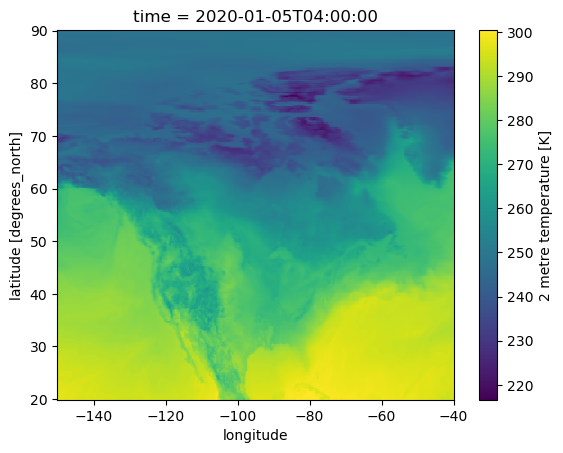

In [36]:
data.isel(time=100).plot()